In [1]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import numpy as np


In [9]:
# Load the CSV file
data = pd.read_csv('BostonHousing.csv')

# Define feature names (exclude 'B', include all other features)
feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 
                 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']

# Extract features and target
x_full = data[feature_names].values
y_full = data['MEDV'].values

# Split into training and test sets
x_train_full, x_test, y_train_full, y_test = train_test_split(x_full, y_full, test_size=0.2, random_state=42)

# Create DataFrame for the full training data
train_df = pd.DataFrame(x_train_full, columns=feature_names)
train_df['MEDV'] = y_train_full

# Display the first 5 rows
print("Training Data (first 5 rows):")
print(train_df.head())

# Create DataFrame for test data
test_df = pd.DataFrame(x_test, columns=feature_names)
test_df['MEDV'] = y_test
print("\nTest Data (first 5 rows):")
print(test_df.head())

Training Data (first 5 rows):
       CRIM    ZN  INDUS  CHAS     NOX     RM   AGE     DIS   RAD    TAX  \
0  15.02340   0.0  18.10   0.0  0.6140  5.304  97.3  2.1007  24.0  666.0   
1   0.62739   0.0   8.14   0.0  0.5380  5.834  56.5  4.4986   4.0  307.0   
2   0.03466  35.0   6.06   0.0  0.4379  6.031  23.3  6.6407   1.0  304.0   
3   7.05042   0.0  18.10   0.0  0.6140  6.103  85.1  2.0218  24.0  666.0   
4   0.72580   0.0   8.14   0.0  0.5380  5.727  69.5  3.7965   4.0  307.0   

   PTRATIO  LSTAT  MEDV  
0     20.2  24.91  12.0  
1     21.0   8.47  19.9  
2     16.9   7.83  19.4  
3     20.2  23.29  13.4  
4     21.0  11.28  18.2  

Test Data (first 5 rows):
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS   RAD    TAX  \
0  0.09178   0.0   4.05   0.0  0.510  6.416  84.1  2.6463   5.0  296.0   
1  0.05644  40.0   6.41   1.0  0.447  6.758  32.9  4.0776   4.0  254.0   
2  0.10574   0.0  27.74   0.0  0.609  5.983  98.8  1.8681   4.0  711.0   
3  0.09164   0.0  10.81   0.0  0.4

In [11]:
# Split training data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=42)

In [13]:
# Standardize the features (but not the target)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)

In [15]:
# Define the regression metrics display function
def regression_metrics_display(y_true, y_pred):
    print(f"MAE is {metrics.mean_absolute_error(y_true, y_pred):.2f}")
    print(f"MSE is {metrics.mean_squared_error(y_true, y_pred):.2f}")
    print(f"R2 score is {metrics.r2_score(y_true, y_pred):.2f}")

In [23]:
# Build the Deep Neural Network model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(12,), name='input-layer'),  # 12 features
    tf.keras.layers.Dense(100, activation='relu', name='hidden-layer-1'),
    tf.keras.layers.BatchNormalization(name='batch-norm-1'),
    tf.keras.layers.Dense(50, activation='relu', name='hidden-layer-2'),
    tf.keras.layers.Dense(1, name='output-layer')  # No activation for linear regression
])

In [25]:
# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [27]:
# Train the model
history = model.fit(x_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(x_val_scaled, y_val), verbose=1)


Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 592.3362 - mae: 22.7589 - val_loss: 570.0507 - val_mae: 22.4673
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 542.5394 - mae: 21.5749 - val_loss: 543.6113 - val_mae: 21.9393
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 473.5242 - mae: 20.0892 - val_loss: 511.9326 - val_mae: 21.2960
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 411.4738 - mae: 18.6130 - val_loss: 472.6035 - val_mae: 20.4696
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 305.5059 - mae: 16.0956 - val_loss: 425.7344 - val_mae: 19.4344
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 239.9756 - mae: 14.0873 - val_loss: 372.0527 - val_mae: 18.1583
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 206.8095 - mae: 12.7115 - val_loss: 314.0873 - val_mae: 16.6319
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 137.3793 - mae: 10.0567 - val_loss: 262.8737 - val_mae: 15.1070
Epoch 9/1

In [29]:
# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(x_test_scaled, y_test, verbose=0)
print(f"\nTest Mean Absolute Error: {test_mae:.2f} thousand dollars")


Test Mean Absolute Error: 2.18 thousand dollars


In [31]:

# Make predictions
y_pred = model.predict(x_test_scaled, verbose=0).flatten()  # Flatten to match y_test shape


In [33]:
# Display regression metrics
print("\nRegression Metrics on Test Set:")
regression_metrics_display(y_test, y_pred)


Regression Metrics on Test Set:
MAE is 2.18
MSE is 10.42
R2 score is 0.86


In [43]:
# Print sample predictions
print("\nSample Predictions (Predicted vs Actual):")
for i in range(10):
    print(f"Sample {i+1}: Predicted = {y_pred[i]:.2f}, Actual = {y_test[i]:.2f}")


Sample Predictions (Predicted vs Actual):
Sample 1: Predicted = 25.19, Actual = 23.60
Sample 2: Predicted = 32.29, Actual = 32.40
Sample 3: Predicted = 17.20, Actual = 13.60
Sample 4: Predicted = 23.38, Actual = 22.80
Sample 5: Predicted = 15.91, Actual = 16.10
Sample 6: Predicted = 22.00, Actual = 20.00
Sample 7: Predicted = 18.26, Actual = 17.80
Sample 8: Predicted = 13.93, Actual = 14.00
Sample 9: Predicted = 24.20, Actual = 19.60
Sample 10: Predicted = 20.09, Actual = 16.80


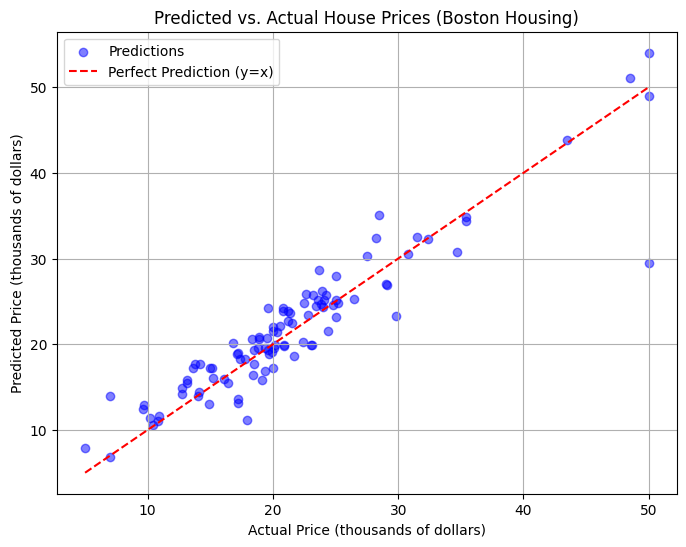

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_test and y_pred are available from the DNN model
# If not, they can be generated using the previous code:
# y_pred = model.predict(x_test_scaled, verbose=0).flatten()

# Scatter Plot: Predicted vs. Actual Prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction (y=x)')
plt.xlabel('Actual Price (thousands of dollars)')
plt.ylabel('Predicted Price (thousands of dollars)')
plt.title('Predicted vs. Actual House Prices (Boston Housing)')
plt.legend()
plt.grid(True)
plt.show()


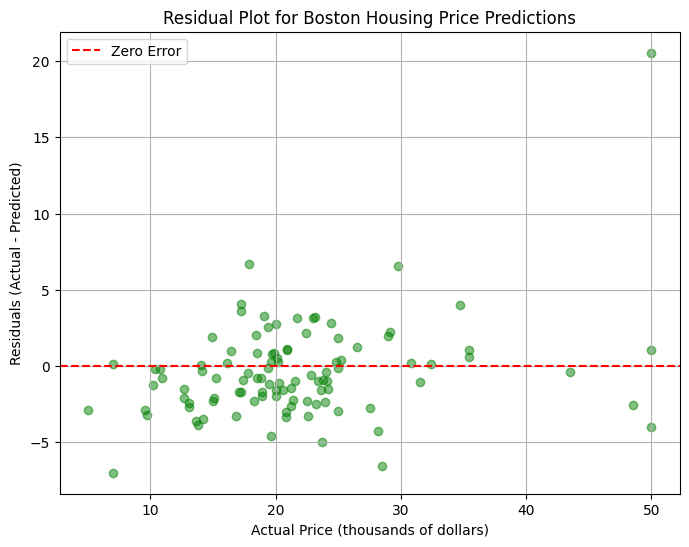

In [39]:
# Residual Plot: Errors vs. Actual Prices
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals, alpha=0.5, color='green')
plt.axhline(y=0, color='red', linestyle='--', label='Zero Error')
plt.xlabel('Actual Price (thousands of dollars)')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot for Boston Housing Price Predictions')
plt.legend()
plt.grid(True)
plt.show()

ValueError: Shape of passed values is (404, 12), indices imply (404, 13)